In [15]:
from myusefultools.pyopenfoam import OpenFOAM
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
from matplotlib.ticker import MaxNLocator

from myusefultools.he_utilities import set_matplotlib_customization
set_matplotlib_customization(plt)

In [16]:
of = OpenFOAM(
    path_case=Path("twenty_days"), 
    path_template=".")

In [17]:
of.foam_to_vtk()

rm: cannot remove 'VTK': No such file or directory
rm: cannot remove 'VTK_soilProperties': No such file or directory


In [18]:
igt = 0
fields = ["XAR", "Sw", "porosity"]
# fields = ["XAR"]
scalars = {f: of.read_field_all_times(f) for f in fields}

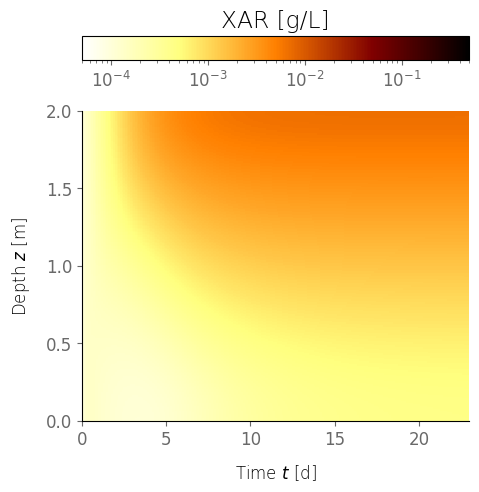

In [19]:
for k, scalar in scalars.items():
    if k == "XAR":
        fig, (cax, ax) = plt.subplots(
                2, 1, figsize=[5, 5], gridspec_kw={"height_ratios": [0.4, 5], "hspace":0.3}, sharex=False
            )

    # if k == "XAR":
        pcolor_kwargs = dict( 
            cmap="afmhot_r",
            norm=colors.LogNorm(vmin=5.0e-5, vmax=5e-1)
        )
    # else:
    #     pcolor_kwargs = dict(
    #         cmap="Blues"
    #     )
    
        img = ax.pcolormesh(scalar.t[igt:] / 86400, scalar.z, scalar[:, igt:],**pcolor_kwargs)
        ax.set_ylim(0,2)
        ax.set_xlim(left=0)

        ax.xaxis.set_major_locator(MaxNLocator(5))
        ax.yaxis.set_major_locator(MaxNLocator(4))

        ax.spines.right.set_visible(False)
        ax.spines.top.set_visible(False)

        ax.set_xlabel("Time $t$ [d]")
        ax.set_ylabel("Depth $z$ [m]")
        plt.colorbar(img, cax=cax, orientation="horizontal")
        cax.set_title(f"{k} [g/L]", fontdict=dict(weight=100))
        # fig.tight_layout()
        fig.set_facecolor(color="#FFFFFF")
        plt.show()

# plt.savefig("PNG/XAR.png", dpi=400, bbox_inches="tight", pad_inches=0.1)

In [20]:
Sw_time = scalars["Sw"]
Sw_time.values

porosity_time = scalars["porosity"]

(231,)
(231,)


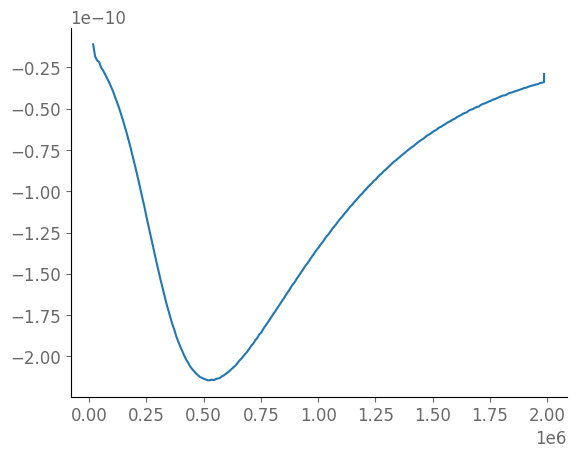

In [21]:
deltaLenght = 0.01  # From blockMeshDict
cross_area = 0.20 * 0.20

Sw_integrated = np.sum(Sw_time.values * deltaLenght * cross_area * porosity_time.values, axis=0)
print(Sw_integrated.shape)
print(Sw_time.t.shape)
# plt.plot(Sw_time.t, Sw_integrated)

plt.plot(Sw_time.t[1:], np.diff(Sw_integrated)/np.diff(Sw_time.t))

In [22]:
of.boundaryProbes_to_txt()
of.process_boundaryProbes()

points_Sw_h.xy points_U.xy
Processed points_Sw_h.xy !
Processed points_U.xy !


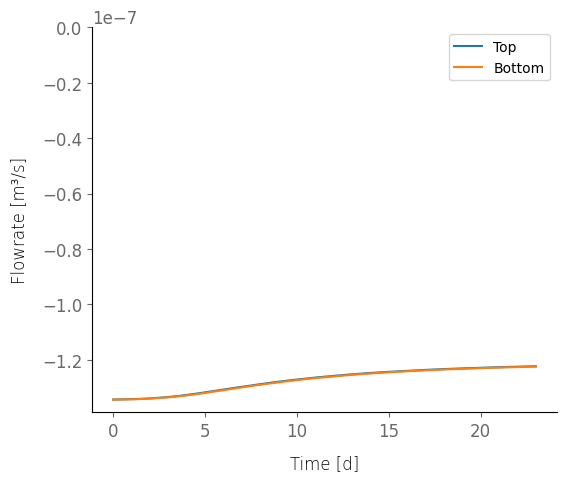

In [23]:
for bp in of.boundaryProbes:
    for k, v in bp.array_data.items():
        if k == "Uz":
            vtop = v.values[1] * cross_area
            vbottom = v.values[0] * cross_area
            vtime = v.time
        
        if k == "Uz": # or k == "h": 
            fig, ax = plt.subplots(figsize=[6, 5])
            # ax.plot(v.time, v.values[0])
            ax.plot(v.time/86400, v.values[1] * cross_area, label="Top")
            ax.plot(v.time/86400, v.values[0] * cross_area, label="Bottom")
            ax.set_xlabel("Time [d]")
            ax.set_ylabel("Flowrate [m³/s]")
            ax.legend()
            ax.set_ylim(-1.39e-7, 0)
            # v.plot.line(x="time", ax=ax, lw=1)
            fig.set_facecolor("#ffffff")
            plt.show()

In [24]:
vtime.values

array([2.95390000e+02, 5.92485000e+02, 9.12485000e+02, ...,
       1.98659249e+06, 1.98691249e+06, 1.98720000e+06])

In [25]:
np.trapz(vtop, vtime.values)

-0.252913833420472

In [26]:
np.trapz(vbottom, vtime.values)

-0.25323450951473303

In [27]:
np.trapz(vtop, vtime.values) - np.trapz(vbottom, vtime.values)

0.0003206760942610076

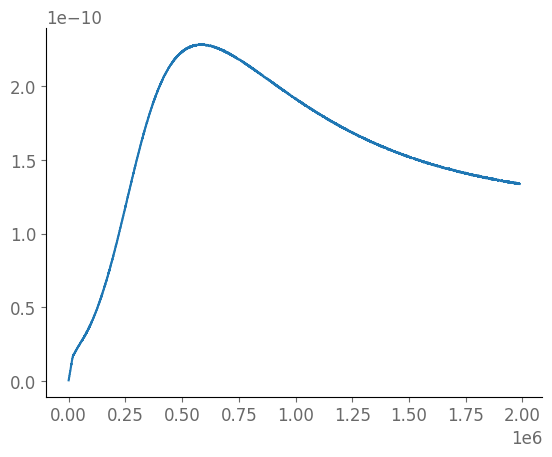

In [28]:
plt.plot(vtime.values, vtop-vbottom)